### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
import seaborn as sns
sns.set (color_codes = True)
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [222]:
df_data = pd.read_csv ('Data.csv')
df_item = pd.read_csv ('item.csv')
df_user = pd.read_csv ('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [97]:
df_data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [213]:
df_item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [99]:
df_user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [93]:
df_data.info()
df_item.info()
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Doc

In [87]:
df_data.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [88]:
df_item.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [89]:
df_user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [21]:
df_data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [22]:
df_item.describe()


,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df_user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [28]:
df_data.shape # output 1000,000 rows and 4 columns

(100000, 4)

In [29]:
df_item.shape # output 1,681 rows and 22 columns

(1681, 22)

In [30]:
df_user.shape # output 943 rows and 5 columns

(943, 5)

#### 4. Find the number of movies per genre using the item data - 5 marks

In [92]:
# use sum on the default axis
df_item.tail()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1680,1682,Scream of Stone (Schrei aus Stein),08-Mar-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [277]:
df_item.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [58]:
col_df_itemlabel = ['Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_item[col_df_itemlabel].sum()



Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [118]:
#hint: use sum on the axis = 1

#df_item[col_df_itemlabel].sum(axis=1)

df_item.sum (axis=1)

0          4
1          5
2          4
3          7
4          8
        ... 
1676    1679
1677    1681
1678    1682
1679    1682
1680    1683
Length: 1681, dtype: int64

#6Drop the movie where the genre is unknown - 2.5 marks 

In [232]:
df_item.drop(['unknown'], axis=1)

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Release_years
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1994


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [223]:
a = 'My*cat*is*brown'
print(a.split('*')[1])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

cat
brown
brown


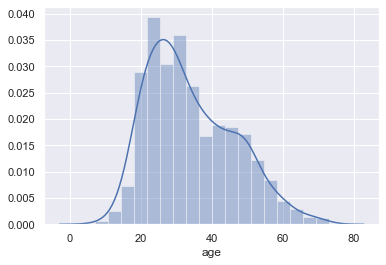

In [129]:
#your answers here
sns.distplot(df_user['age']);

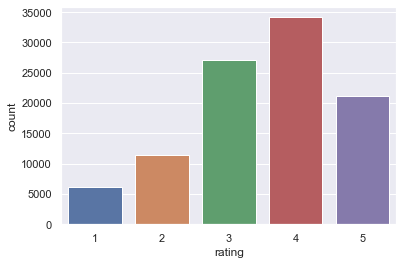

In [131]:
sns.countplot(df_data['rating']);

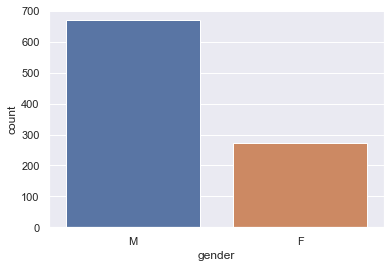

In [132]:
sns.countplot(df_user['gender']);

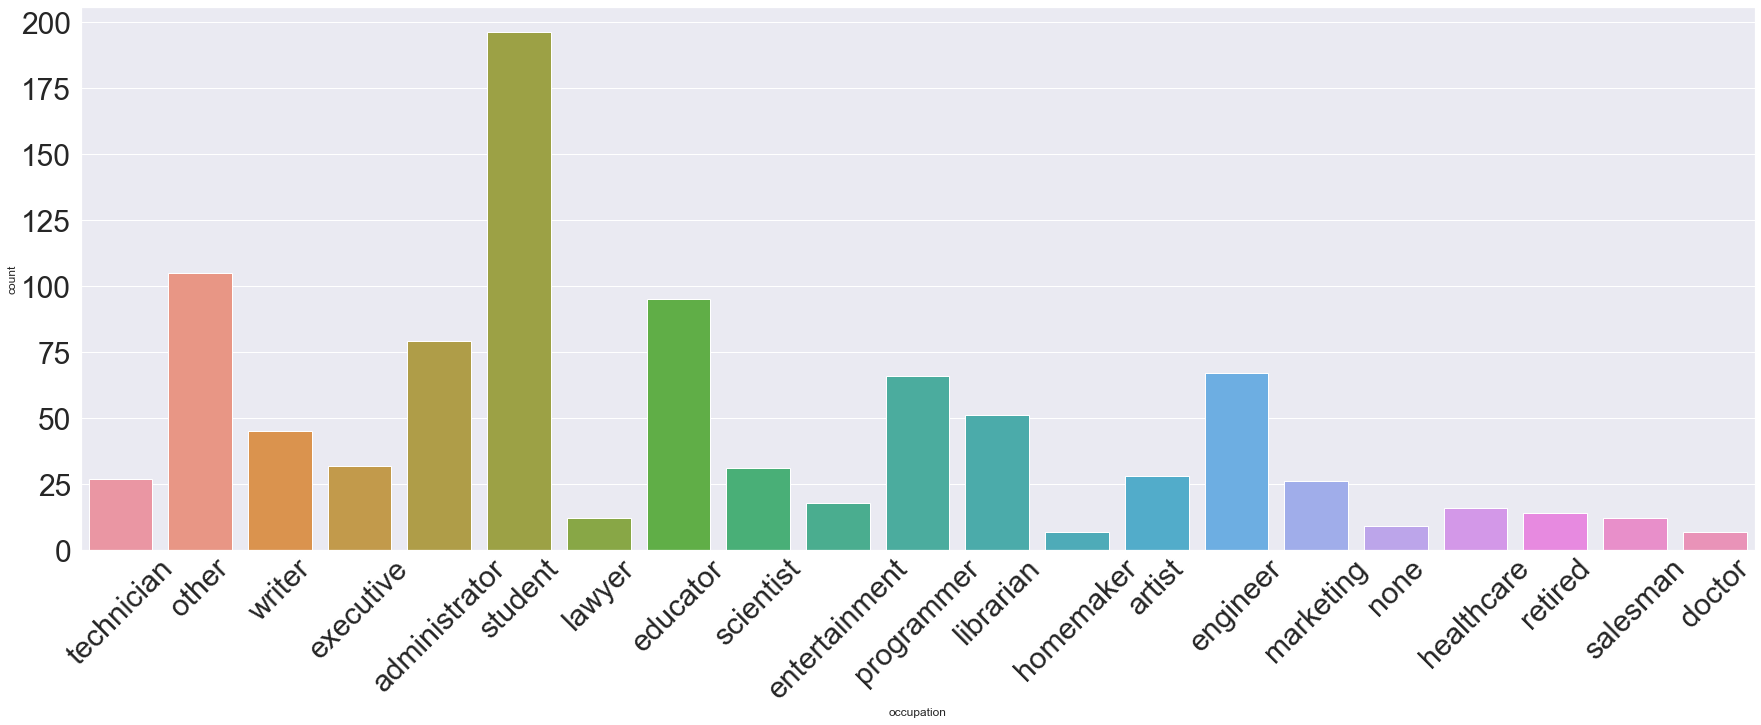

In [267]:
f, ax = plt.subplots(figsize=(30, 10))
ax.tick_params(axis="x", direction='in', labelrotation=45, labelsize=30)
ax.tick_params(axis="y", labelsize=30)
sns.countplot(df_user['occupation']);

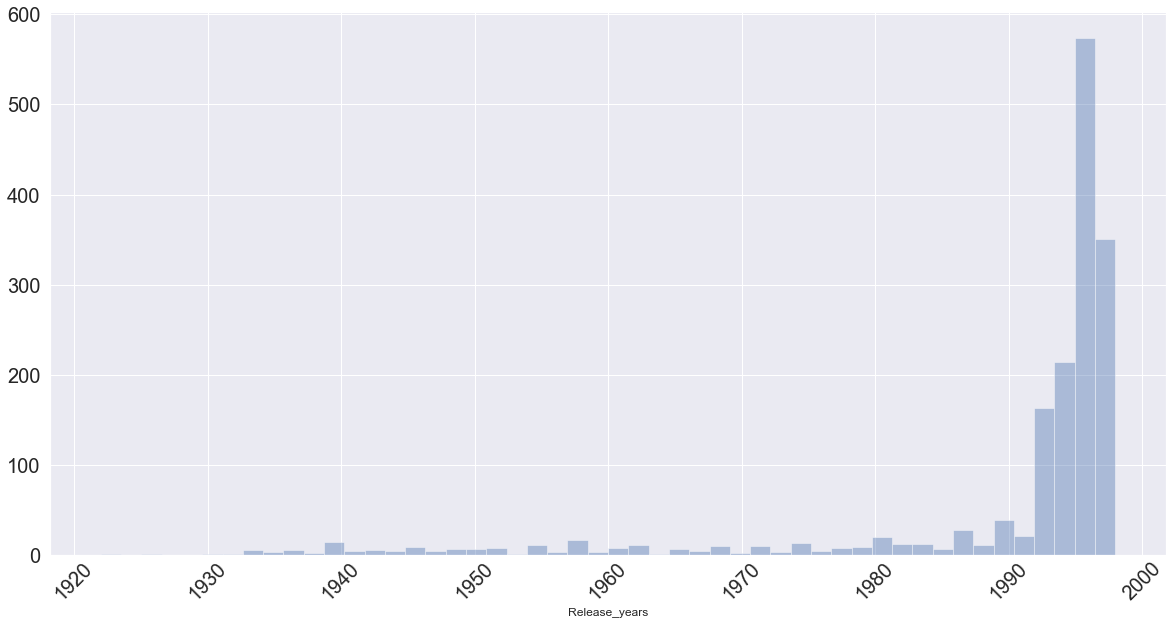

In [227]:
a = df_item ['release date']
a  = a .str.split("-", n = 2, expand = True) 
a
Year = a [2] 
Year
df_item ['Release_years'] = Year
df_item

f, ax = plt.subplots(figsize=(20, 10))
ax.tick_params(axis="x", labelsize=20, labelrotation=45, direction='in')
ax.tick_params(axis="y", labelsize=20)

sns.distplot (df_item['Release_years'], kde=False);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [262]:
#Your answer here
df1_item = df_item
df1_item.set_index('Release_years')
df1_item = df1_item.groupby('Release_years').sum()
df1_item 

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Release_years,,,,,,,,,,,,,,,,,,,,
1922,675,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,1542,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,617,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,656,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,1124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,189000,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,183514,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,322295,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


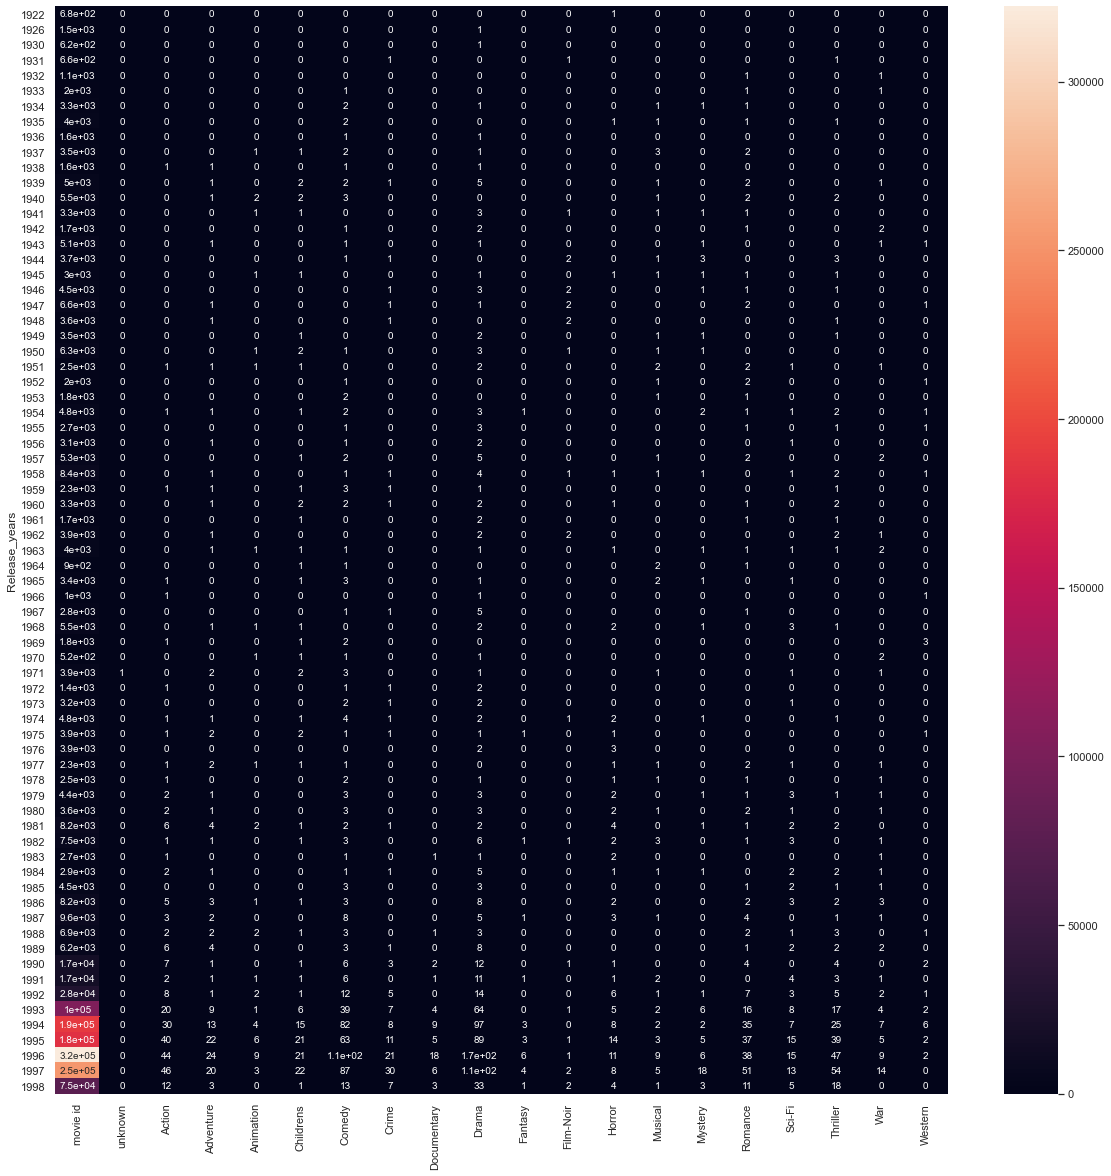

In [263]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap (df1_item, annot=True);

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [283]:
#your answer here

df4_movie = pd.merge(df_data,df_item,how='outer',on='movie id')

myMovieList=df4_movie.groupby('movie title')['rating']\
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(20)

myMovieList



,movie title,count
1394,Star Wars,583
332,Contact,509
497,Fargo,508
1233,Return of the Jedi,507
859,Liar Liar,485
459,"English Patient, The",481
1281,Scream,478
1518,Toy Story,452
32,Air Force One,431
743,Independence Day (ID4),429


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [296]:
df5_gender = pd.merge(df_user,df_data,how='outer',on='user id')
df6_gender = pd.merge(df5_gender,df_item,how='outer',on='movie id')
df6_gender


,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Release_years
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994
2,18,35,F,other,37212,61,4,880130803,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,17,M,student,60089,1679,3,889289491,B. Monkey,06-Feb-1998,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1998
99996,863,17,M,student,60089,1678,1,889289570,Mat' i syn,06-Feb-1998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998
99997,863,17,M,student,60089,1680,2,889289570,Sliding Doors,01-Jan-1998,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1998
99998,896,28,M,writer,91505,1681,3,887160722,You So Crazy,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994


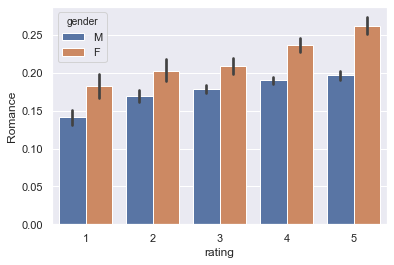

In [299]:
sns.barplot(df6_gender['rating'], df6_gender['Romance'], hue=df6_gender['gender']);
#From the result of the plot below it can be concluded that more Women watch Romance movies than Men

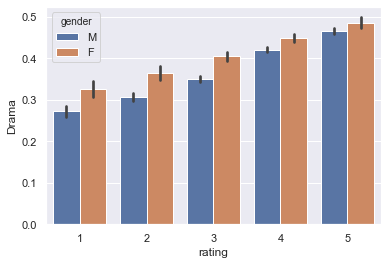

In [300]:
sns.barplot(df6_gender['rating'], df6_gender['Drama'], hue=df6_gender['gender']);
#From the result of the plot below it can be concluded that more Women watch Drama movies than Men

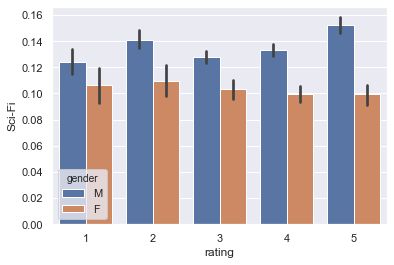

In [301]:
sns.barplot(df6_gender['rating'], df6_gender['Sci-Fi'], hue=df6_gender['gender']);
#From the result of the plot below it can be concluded that more Men watch Sci-Fi movies than Women